# I: Univariate Feature Selection
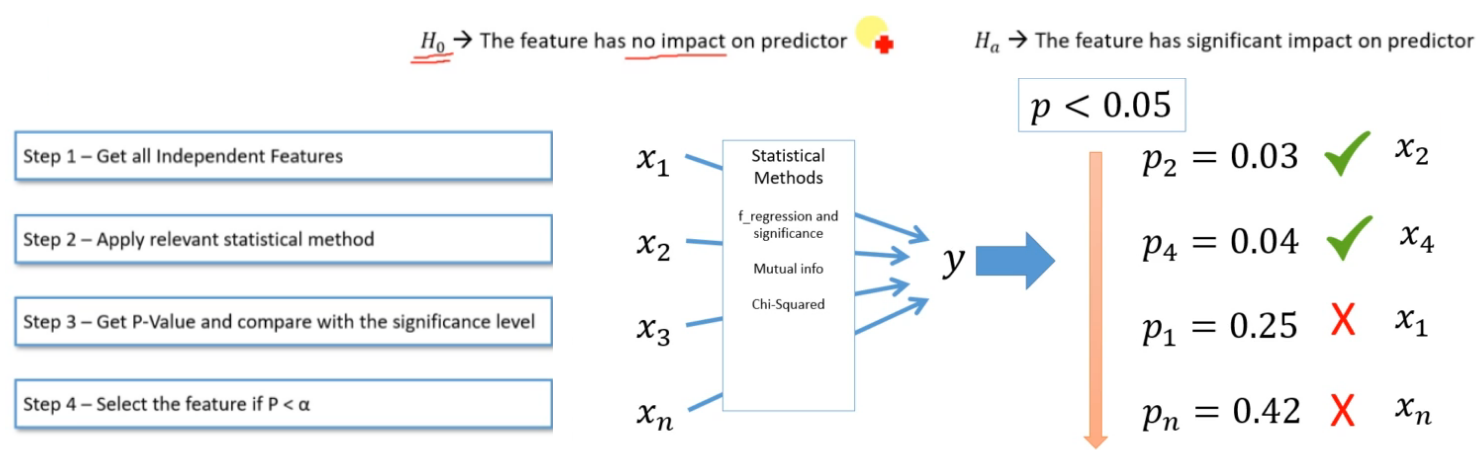

###### Các method
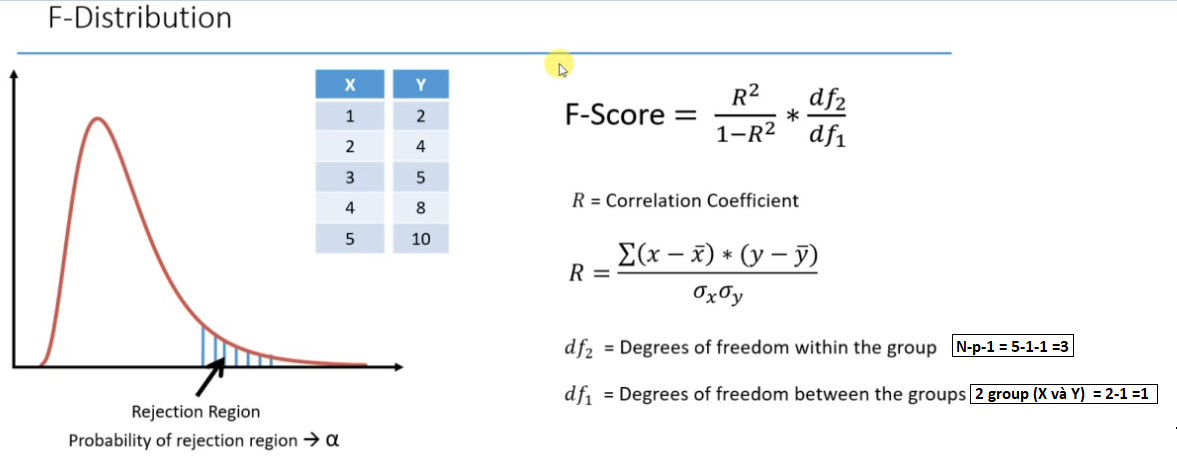

In [3]:
import pandas as pd
data = pd.read_csv("Students2.csv")
data.head()

,Hours,sHours,hoursplayed,income,distance,calories,Marks
0,0,6,6,146,9,2491,34
1,1,7,2,112,5,2303,36
2,1,6,1,84,7,2475,33
3,1,8,5,134,0,2282,39
4,1,8,5,104,8,2359,42


In [10]:
X = data.iloc[:,:-1]
Y = data.Marks

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.4, random_state = 1234)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

from sklearn.metrics import mean_squared_error
import math
rmse= math.sqrt(mean_squared_error(y_test,y_pred))
rmse

6.9822067153574565

In [14]:
from sklearn.feature_selection import f_regression as fr
result = fr(X,Y)
f_score = result[0]
p_values = result[1]
p_values
# Chỉ có 2 features đầu có p_value <5% . Drop các feature còn lại

array([1.77038466e-12, 4.14028344e-02, 9.69907241e-01, 6.92200477e-01,
       9.55528076e-01, 5.30086171e-01])

In [16]:
# Test xem ket qua co tot hon k
X = data.iloc[:,:2]
Y = data.Marks

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.4, random_state = 1234)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

from sklearn.metrics import mean_squared_error
import math
rmse= math.sqrt(mean_squared_error(y_test,y_pred))
rmse

#rmse đã nhỏ hơn 5.09 < 0.98

5.0972172810811305

###### Chi- Square

######  Selection Transform sử dụng Select Kbest và SelectPecentile
Lựa chọn ra K-best feature hoặc % (pecentile)
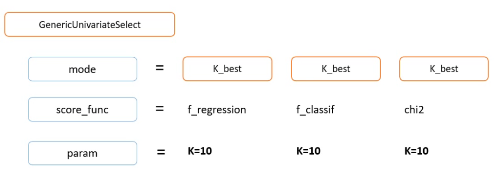

In [30]:
X = data.iloc[:,:-1]
Y = data.Marks
from sklearn.feature_selection import SelectKBest, SelectPercentile, GenericUnivariateSelect, f_regression

# SelectK_best
select_kbest = SelectKBest(score_func= f_regression, k=3)
x_K = select_kbest.fit_transform(X,Y)
#get f_scrore, p_values
f_score = select_kbest.scores_
p_value = select_kbest.pvalues_
#get name of column
cols = select_kbest.get_support(indices=True)
cols #lay feature 0,1,5

array([0, 1, 5], dtype=int64)

In [35]:
# Select_percentile
Select_percentile = SelectPercentile(score_func= f_regression, percentile=30)
x_P = Select_percentile.fit_transform(X,Y)
#get f_scrore, p_values
f_score = Select_percentile.scores_
p_value = Select_percentile.pvalues_
#get name of column
cols = Select_percentile.get_support(indices=True)
cols #lay feature 0,1

array([0, 1], dtype=int64)

In [37]:
# ---------------- GenericUnivariateSelect
# using k_best mode
select_G1 = GenericUnivariateSelect(score_func=f_regression, mode='k_best', param =3)
x_G1 = select_G1.fit_transform(X,Y)
print(select_G1.get_support(indices=True))

# using percentile mode
select_G2 = GenericUnivariateSelect(score_func=f_regression, mode='percentile', param =50)
x_G2 = select_G2.fit_transform(X,Y)
print(select_G2.get_support(indices=True))

[0 1 5]
[0 1 5]


# II: Recursive Future Elimination (Loại bỏ đệ quy)
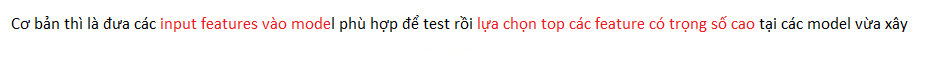
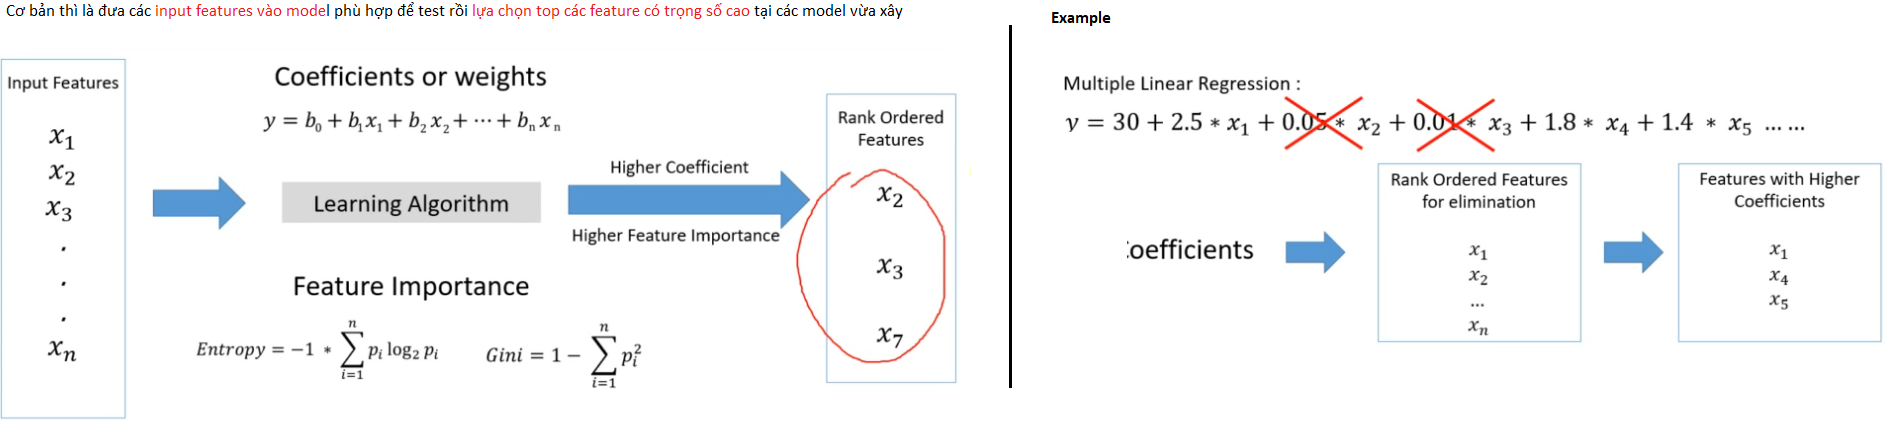

In [10]:
import pandas as pd
data = pd.read_csv("bank.csv")

# Có 1 cột Duration là thời gian gọi. Đây là 1 feature quan trọng vì thời gian gọi lâu có thể sẽ chốt được kháchvì nếu k có
# nhu cầu họ sẽ dập máy ngay. Tuy nhiên dữ liệu này có sau khi gọi cho khách -> rất khó để biết giá trị này ở tương lai
# ta sẽ drop nó đi
data = data.drop("duration", axis = 1)
data.head()
# Dựa vào dữ liệu khách để dự đoán khách có mua hàng hay không

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [32]:
x = data.iloc[:,:-1]
y = data.y

#create dummy 
x = pd.get_dummies(x,drop_first=True)
y = pd.get_dummies(y,drop_first=True)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1234)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)
score1 = rf.score(x_test,y_test)
print(score1)

<ipython-input-32-a5c82a9156fe>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


[[10609   351]
 [  994   403]]
0.8911548110382779


In [17]:
# Test thử với RFE kết quả có tốt hơn k
from sklearn.feature_selection import RFE #Recursive Future Elimination

rdf = RandomForestClassifier(random_state=1234) # Model sử dụng 

rfe = RFE(estimator= rdf, n_features_to_select= 30,step =1 )
#step: Số feature remove tại mỗi iter

rfe.fit(x,y)

x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)
x_train_rfe.shape
# Từ 52 features giảm xuống còn 30 features

C:\Users\hoang\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\hoang\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\hoang\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\hoang\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

RFE(estimator=RandomForestClassifier(random_state=1234),
    n_features_to_select=30)

In [34]:
# Test thử kết quả
rf2 = RandomForestClassifier()
rf2.fit(x_train_rfe, y_train)
y_pred_rfe = rf2.predict(x_test_rfe)

cm2 = confusion_matrix(y_test, y_pred_rfe)
print(cm2)
score2 = rf2.score(x_test_rfe,y_test)
print(score2)

# Kết quả k cải thiện nhiều mà đứng yên tuy nhiên ta bỏ được tới 22 feature k cần thiết

<ipython-input-34-d9287d89896c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2.fit(x_train_rfe, y_train)


[[10617   343]
 [  993   404]]
0.8918831431577243


In [49]:
# Get Feature importance score
columns = x.columns
ranking = rfe.ranking_  #1 là feature được chọn

feature_important = rf.feature_importances_  #lấy giá trị của model đầu tiên vì nó đủ 52 feature

rfe_df = pd.DataFrame()
rfe_df['column_name'] = columns
rfe_df['ranking'] = ranking
rfe_df['feature_important'] = feature_important
rfe_df[rfe_df.ranking == 1].sort_values(by = 'feature_important', ascending = False).reset_index()

,index,column_name,ranking,feature_important
0,0,age,1,0.170378
1,7,euribor3m,1,0.132396
2,1,campaign,1,0.083394
3,8,nr.employed,1,0.053568
4,33,housing_yes,1,0.037923
5,2,pdays,1,0.033597
6,6,cons.conf.idx,1,0.029967
7,35,loan_yes,1,0.024126
8,5,cons.price.idx,1,0.023192
9,20,marital_married,1,0.021349
